# NMDA2021第三次作业
MNIST是视觉处理方面的结构比较简单的标准数据集。我们已经将数据集整理，包括手写16\*16像素的黑白手写数字图像和对应的数字标记，并分为train,validation和test三组。图像数据已经转换为256长度的灰度值向量，标签的值为0-9。training set用于训练网络，validation set用于在训练过程中观察训练是否出现了过拟合。test set用于训练结束后评价训练结果。

本次作业将训练包含一层隐层的神经网络在MNIST数据集上进行分类任务。你需要完成Assignment3.ipynb和Network.py。

Assignment3.ipynb将引导你完成任务，你需要按顺序运行里面的模块。
Network.py中定义了Network类。Network类中定义了多个反向传播算法相关的方法，目前只是定义了接口，在下面的任务中需要完成代码。

如果你对python中面向对象概念不熟悉，请先学习相关的概念。可以参考https://zhuanlan.zhihu.com/p/37145434

### 要求完成并提交的文件：

* Assignment3.ipynb 本次作业的主要文件 （本文件）

* Network.py 本次作业中用来实现Network类的文件

* back_prop.pdf 推导反向传播的计算过程

### 我们提供的其他文件：

* X_test.npy X_train.npy X_val.npy Y_test.npy Y_train.npy Y_val.npy 数据文件，已经过整理
* test_utils.py test_pred.npy 帮助检验计算正确性的模组

### 数据格式：

* X: 为np.array，形状为\[N,256\]，其中N为数据的数量。
* y: 为np.array，形状为\[N,\]，N为数据的数量。y的值为0-9，对应相应的标签。
* 下面第二个单元可以用来显示数据的形状


In [1]:
#Initialization
import numpy as np
import matplotlib.pyplot as plt


#test tools
import test_utils

#setting plot default parameters
plt.rcParams['figure.figsize'] = (10.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


Show an example:


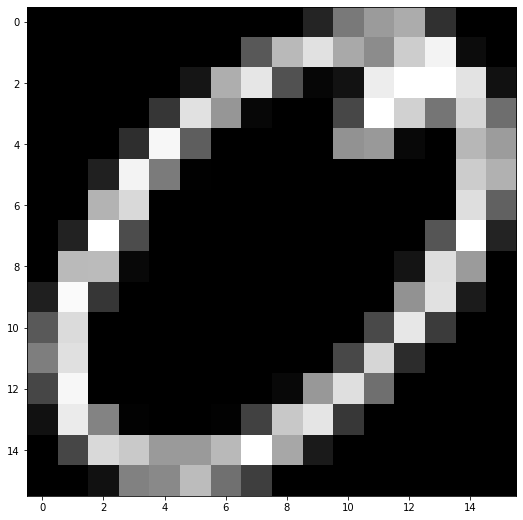

label: 0 

Train data shape:  (9000, 256)
Train labels shape:  (9000,)
Validation data shape:  (1000, 256)
Validation labels shape:  (1000,)
Test data shape:  (1000, 256)
Test labels shape:  (1000,)


In [2]:
# Load the data

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

print('Show an example:')
a0 = X_train[100,:].reshape(16,16)
plt.imshow(a0)
plt.show()
print('label:', y_train[100], '\n')

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

## 任务1 : 完成网络的前向传播

网络的结构为：输入层，隐层，输出层，softmax，交叉熵。其中，隐层激活函数为ReLu。最终的Loss由交叉熵和L2正则项得到。

网络的初始化位于Network类中的\_\_init\_\_方法中。这个方法是python中的类初始化方法。前向传播位于forward_pass方法中，参数为数据X,y,和L2正则项的参数wd_decay。其中,y为缺省参数，当没有y输入时应该输出预测的标签。

由于之后计算反向传播时需要隐层和输出层的计算结果，请将这些计算结果以Network类的成员形式储存。

在未经训练的状态下，loss应接近2.30

### 随机数，伪随机和随机种子：

计算机中存在两种随机数：一类是比较常用的伪随机数，是由一定的算法产生的随机数序列截取而成。这种随机数在一定长度内可以保证相关性为0，通常可以直接作为随机数使用。另一种为真随机数，使用物理方法生成，通过测量物理上不可预测的小量生成。我们在这次作业中使用的都是伪随机数。

随机种子可以控制随机序列的起始状态。而后，根据不同的随机算法，可以迭代出无限长的随机序列。因此，当确定随机种子后，随机序列也完全确定。

任务1中，助教已经使用0作为随机种子，通过随机初始化得到了一个神经网络，并得到了在测试集上的预测。如果你的随机初始化方法和题目要求相同，使用了相同的随机种子，你也应当在测试集上得到相同的预测结果。我们会检查你的预测结果和我们得到的预测结果是否相同

### 要求：
* 参数初始化：W初始化为标准差std的正态分布，b初始化为0
* 前向传播：输入标签y时返回loss，不输入标签y时返回预测的标签predict，predict与y形状相同。

In [3]:
#Test run for task 1

from Network import Network

np.random.seed(0)
hidden_size = 256

net = Network(hidden_size)
predict = net.forward_pass(X_train)
if test_utils.check_pred(predict):
    print('Your prediction PASSed check!')
else: 
    print('Your prediction FAILed check!')
    
loss = net.forward_pass(X_train, y_train)
print('Loss = %f' % loss)

Your prediction PASSed check!
Loss = 2.302585


## 任务2+3：完成网络的反向传播
为检验反向传播算法的正确性，要求使用数值计算梯度进行对比。反向传播和数值计算梯度分别对应back_prop方法和numerical_gradient方法。需要返回grads，类似于params成员，其中包括W1,b1,W2,b2所对应的梯度。
### 要求：
* 推倒反向传播计算过程
* 完成Network类的back_prop方法，返回梯度grads
* 完成数值计算梯度，以小量delta为步长计算梯度并返回
* 检验两种梯度计算结果是否相同

In [4]:
#Test run for task2+3 

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
wd_decay = 0.05
delta = 1e-5

np.random.seed(0)

net = Network(input_size = input_size, hidden_size = hidden_size, output_size = num_classes, std=1e-1)
X, y = test_utils.init_toy_data(num_inputs, input_size, num_classes)

loss = net.forward_pass(X, y, wd_decay = wd_decay)
grads = net.back_prop(X, y, wd_decay = wd_decay)
num_grads = net.numerical_gradient(X, y, wd_decay = wd_decay, delta = delta)

# Errors should all be less than 1e-8 or so
for param_name in grads:
    print('%s max relative error: %e' % (param_name, test_utils.rel_error(num_grads[param_name], grads[param_name])))

W1 max relative error: 1.084016e-09
b1 max relative error: 8.546013e-10
W2 max relative error: 6.633922e-10
b2 max relative error: 2.702162e-10


## 任务4：随机梯度下降
得到了正确的梯度后，可以开始使用随机梯度下降方法进行网络训练，这部分对应train方法。请使用之前实现的前向传播算法和反向传播算法，实现支持momentum的随机梯度下降。在随机梯度下降迭代过程中，每次需要选取数据集的一部分作为minibatch作为数据。为了查看训练过程，需要记录下训练中的loss和正确率的变化过程。代码中提供了4个容器用来记录loss_history,acc_history,val_loss_history,val_acc_history。可以使用append添加记录。

### 要求：
* 实现梯度下降，支持momentum和minibatch
* 记录训练过程中的loss变化和正确率变化

### 为了可以重现实验的结果，以下部分请使用学号作为随机初始化的种子

iteration 0 / 200: training loss 2.302585 val loss: 2.302837
learning_rate: 0.500
iteration 10 / 200: training loss 2.299160 val loss: 2.312475
learning_rate: 0.500
iteration 20 / 200: training loss 2.222647 val loss: 2.168878
learning_rate: 0.500
iteration 30 / 200: training loss 1.919236 val loss: 1.741901
learning_rate: 0.500
iteration 40 / 200: training loss 1.415196 val loss: 1.691155
learning_rate: 0.500
iteration 50 / 200: training loss 1.370976 val loss: 1.363932
learning_rate: 0.500
iteration 60 / 200: training loss 1.071276 val loss: 1.276864
learning_rate: 0.500
iteration 70 / 200: training loss 1.317865 val loss: 1.599958
learning_rate: 0.500
iteration 80 / 200: training loss 1.221579 val loss: 1.198369
learning_rate: 0.500
iteration 90 / 200: training loss 1.415859 val loss: 1.516427
learning_rate: 0.500
iteration 100 / 200: training loss 1.424987 val loss: 1.430574
learning_rate: 0.500
iteration 110 / 200: training loss 1.297894 val loss: 1.356396
learning_rate: 0.500
ite

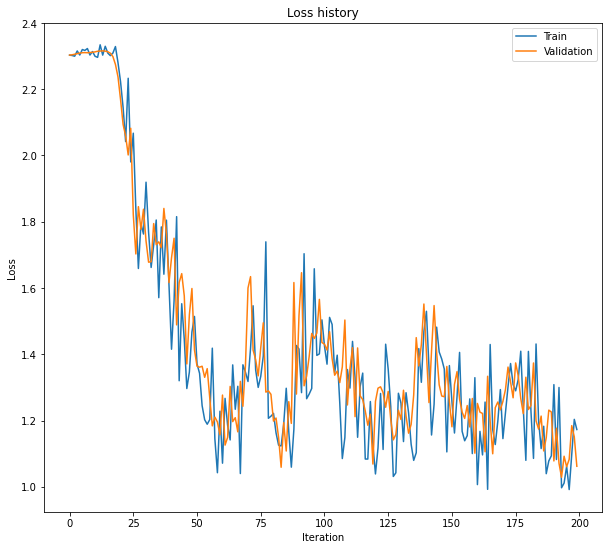

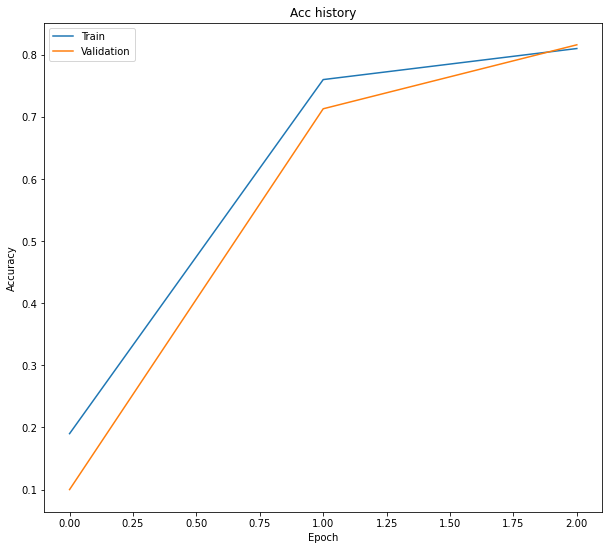

Final accuracy on test set: 0.833


In [5]:
# Test run for task 4

student_id = 2018010650
np.random.seed(student_id)

hidden_size = 10

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.5, momentum=0.9, wd_decay=0.02, 
            num_iters=200, batch_size=100,
            do_early_stopping=False,
            print_every=10, verbose=True)

test_utils.plot_loss_history(stats['loss_history'], stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

## 任务5：增加训练策略
 
我们已经得到了一个可以工作的神经网络，并且实现了使用梯度下降进行训练。下面，我们首先使用一个256隐层的网络去训练，观察训练结果。

接下来增加如下两种训练策略：

Early stop策略是一种简单的防止过拟合的策略，通过验证集上loss的变化监测何时停止训练。

Learning rate decay 是另一个常见的训练策略。通过逐步减小的learning rate达到更好的训练效果。 

### 要求：
* 修改训练函数train，实现early stop和Learning rate decay

iteration 0 / 2000: training loss 2.302592 val loss: 2.302751
learning_rate: 0.500
iteration 50 / 2000: training loss 1.203307 val loss: 1.242918
learning_rate: 0.500
iteration 100 / 2000: training loss 1.093114 val loss: 1.239140
learning_rate: 0.500
iteration 150 / 2000: training loss 0.994028 val loss: 1.117714
learning_rate: 0.500
iteration 200 / 2000: training loss 0.919119 val loss: 0.949051
learning_rate: 0.500
iteration 250 / 2000: training loss 0.868117 val loss: 1.068233
learning_rate: 0.500
iteration 300 / 2000: training loss 1.235578 val loss: 1.238642
learning_rate: 0.500
iteration 350 / 2000: training loss 1.335943 val loss: 1.318320
learning_rate: 0.500
iteration 400 / 2000: training loss 1.108312 val loss: 1.212963
learning_rate: 0.500
iteration 450 / 2000: training loss 1.241730 val loss: 1.257437
learning_rate: 0.500
iteration 500 / 2000: training loss 1.269664 val loss: 1.088869
learning_rate: 0.500
iteration 550 / 2000: training loss 1.177258 val loss: 1.217125
lear

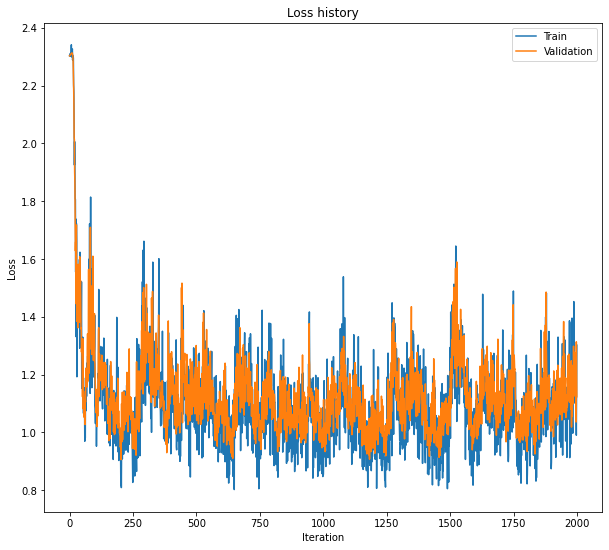

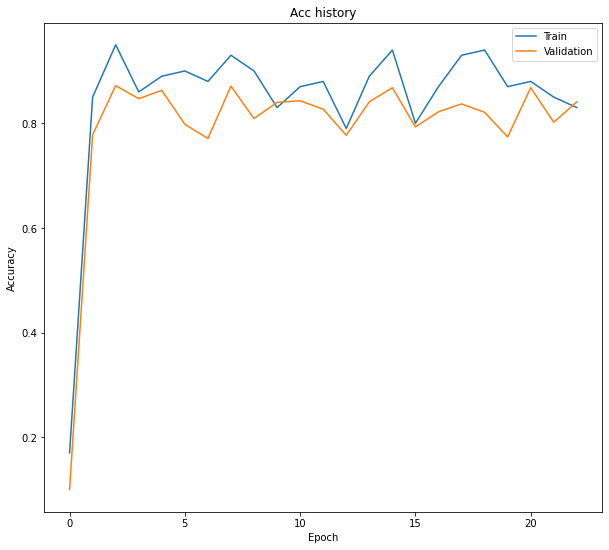

Final accuracy on test set: 0.85


In [6]:
from Network import Network
#original run without two strategies

student_id = 2018010650
np.random.seed(student_id)

hidden_size = 256

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.5, momentum=0.9, wd_decay=0.02, 
            num_iters=2000, batch_size=100,
            do_early_stopping=False,
            print_every=50, verbose=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

iteration 0 / 2000: training loss: 2.302592 val loss: 2.302751
learning_rate: 0.500
iteration 50 / 2000: training loss: 1.203307 val loss: 1.242918
learning_rate: 0.500
iteration 100 / 2000: training loss: 1.093114 val loss: 1.239140
learning_rate: 0.500
iteration 150 / 2000: training loss: 0.994028 val loss: 1.117714
learning_rate: 0.500
iteration 200 / 2000: training loss: 0.919119 val loss: 0.949051
learning_rate: 0.500
iteration 250 / 2000: training loss: 0.868117 val loss: 1.068233
learning_rate: 0.500
iteration 300 / 2000: training loss: 1.235578 val loss: 1.238642
learning_rate: 0.500
iteration 350 / 2000: training loss: 1.335943 val loss: 1.318320
learning_rate: 0.500
iteration 400 / 2000: training loss: 1.108312 val loss: 1.212963
learning_rate: 0.500
iteration 450 / 2000: training loss: 1.241730 val loss: 1.257437
learning_rate: 0.500
iteration 500 / 2000: training loss: 1.269664 val loss: 1.088869
learning_rate: 0.500
iteration 550 / 2000: training loss: 1.177258 val loss: 1

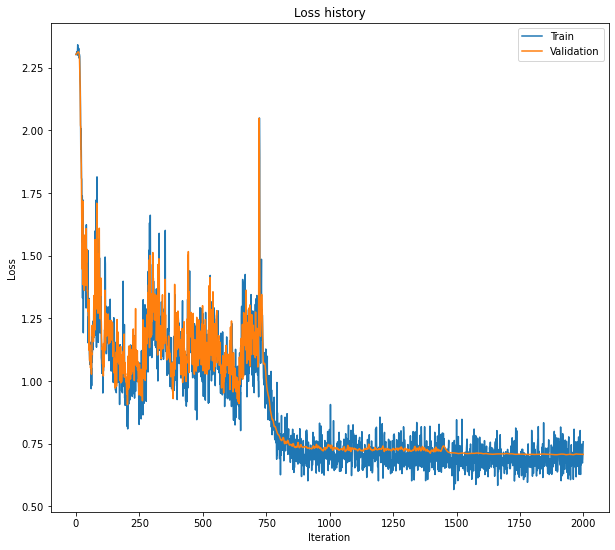

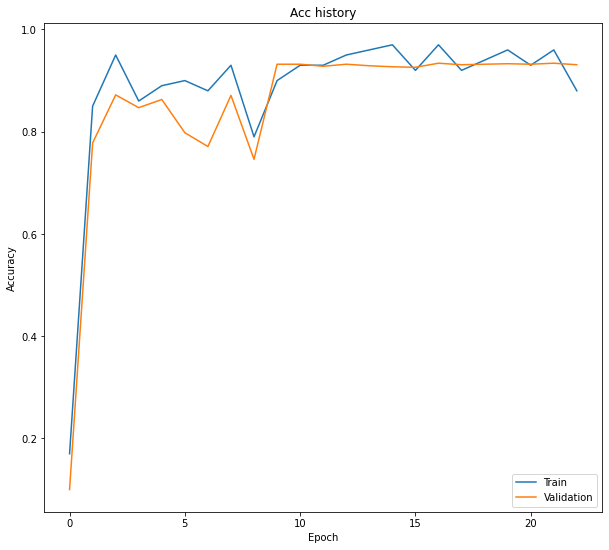

Final accuracy on test set: 0.934


In [3]:
from Network import Network
# new run with the two strategies

#
# TODO : training process with early stop and learning rate decay
#
student_id = 2018010650
np.random.seed(student_id)

hidden_size = 256

net = Network(hidden_size = hidden_size)

#提示：由于增加了两种策略，下面train方法中需要增加部分输入参数
# added: do_lr_decay=True
# lr_decay method: StepLR
stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.5, momentum=0.9, wd_decay=0.02, 
            num_iters=2000, batch_size=100,
            do_early_stopping=True,
            print_every=50, verbose=True,
            do_lr_decay=True
            )

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

### 总结
1. lr_scheduler选择StepLR，由于一共有num_iters=2000 / (N=9000 / batch_size=100)约22个epoch，选择每经过step_size=8个epoch将learning_rate乘以gamma=0.1；
2. early stopping根据我的理解，可以以几个epoch之间的val_loss作为判断标准，也可以以val_acc作为判断标准，本次因为accuracy是每个epoch求一次，所以使用了这样的策略：Early stops the training if validation accuracy doesn't improve after a given patience=7.从acc曲线中可以看出，没有出现early stopping现象。
3. 测试集上的accuracy为0.934，对比未加入learning rate decay时有了显著的提高

## 任务6：Tuning
 
调整超参数，得到尽量好的神经网络。初始化参数和网络参数都可能对最终的训练结果产生影响。

网格搜索法是一种常见的调参方法。将不同参数的可能取值列出，选择参数取值不同排列组合进行训练，最后可以选出最优的一组参数。

随机搜索法是另一种常见的调参方法。当网格搜索法调参需要的计算量过大时，可以使用随机搜索法进行，通过不断的随机出超参数进行训练，多次随机后选择最优的一组参数。

### 可以调整的超参数有：
* learning rate
* L2 regularization factor
* Hidden layer size
* learning rate decay
* early stop policy

### 要求：
* 使用网格搜索法或随机搜索法，得到一组超参数。除了列出的超参数外，也可以选择调整别的参数。请保留你的调参过程的代码。
* 展示得到的超参数进行训练的最终结果和Loss记录，在notebook中记录选择的参数和在测试集上得到的正确率。画图可以使用test_utils.plot_loss_history，用法参考前面的代码。

In [7]:
from Network import Network
# Test run for task 5

student_id = 2018010650
np.random.seed(student_id)

#
# TODO : Tuning 
#
# grid search method to get the best parameters, about half an hour required to run this

learning_rate_list=[0.5,0.4,0.3,0.2,0.1]
wd_decay_list=[0.02,0.01,0]
hidden_size_list=[512,256,128,64]

grid_search_record = {}
grid_search_record['acc'] = []
grid_search_record['learning_rate'] = []
grid_search_record['wd_decay'] = []
grid_search_record['hidden_size'] = []

for learning_rate in learning_rate_list:
    for wd_decay in wd_decay_list:
        for hidden_size in hidden_size_list:
            
            net = Network(hidden_size = hidden_size)
            stats = net.train(X_train, y_train, X_val, y_val,
                    learning_rate=learning_rate, momentum=0.9, wd_decay=wd_decay, 
                    num_iters=2000, batch_size=100,
                    do_early_stopping=False,
                    print_every=50, verbose=False,
                    do_lr_decay=True)
            acc = net.get_acc(X_test, y_test)
            
            # record the parameters and acc
            grid_search_record['acc'].append(acc)
            grid_search_record['learning_rate'].append(learning_rate)
            grid_search_record['wd_decay'].append(wd_decay)
            grid_search_record['hidden_size'].append(hidden_size)
            
            print('-----------------')
            print('lr: %.1f  L2regfactor: %.2f  hidden_size: %d' %(learning_rate, wd_decay, hidden_size))
            print('Final accuracy:', acc)

-----------------
lr: 0.5  L2regfactor: 0.02  hidden_size: 512
Final accuracy: 0.936
-----------------
lr: 0.5  L2regfactor: 0.02  hidden_size: 256
Final accuracy: 0.941
-----------------
lr: 0.5  L2regfactor: 0.02  hidden_size: 128
Final accuracy: 0.936
-----------------
lr: 0.5  L2regfactor: 0.02  hidden_size: 64
Final accuracy: 0.937
-----------------
lr: 0.5  L2regfactor: 0.01  hidden_size: 512
Final accuracy: 0.949
-----------------
lr: 0.5  L2regfactor: 0.01  hidden_size: 256
Final accuracy: 0.95
-----------------
lr: 0.5  L2regfactor: 0.01  hidden_size: 128
Final accuracy: 0.948
-----------------
lr: 0.5  L2regfactor: 0.01  hidden_size: 64
Final accuracy: 0.945
-----------------
lr: 0.5  L2regfactor: 0.00  hidden_size: 512
Final accuracy: 0.974
-----------------
lr: 0.5  L2regfactor: 0.00  hidden_size: 256
Final accuracy: 0.969
-----------------
lr: 0.5  L2regfactor: 0.00  hidden_size: 128
Final accuracy: 0.964
-----------------
lr: 0.5  L2regfactor: 0.00  hidden_size: 64
Final 

-----------------
best parameters:
lr: 0.3  L2regfactor: 0.00  hidden_size: 512
Final accuracy under these parameters: 0.975
-----------------
iteration 0 / 2000: training loss: 2.302585 val loss: 2.302637
learning_rate: 0.300
iteration 50 / 2000: training loss: 0.348901 val loss: 0.426587
learning_rate: 0.300
iteration 100 / 2000: training loss: 0.184775 val loss: 0.204450
learning_rate: 0.300
iteration 150 / 2000: training loss: 0.055653 val loss: 0.146944
learning_rate: 0.300
iteration 200 / 2000: training loss: 0.024083 val loss: 0.156263
learning_rate: 0.300
iteration 250 / 2000: training loss: 0.058734 val loss: 0.175334
learning_rate: 0.300
iteration 300 / 2000: training loss: 0.033303 val loss: 0.136430
learning_rate: 0.300
iteration 350 / 2000: training loss: 0.034153 val loss: 0.149310
learning_rate: 0.300
iteration 400 / 2000: training loss: 0.042889 val loss: 0.112166
learning_rate: 0.300
iteration 450 / 2000: training loss: 0.030740 val loss: 0.134237
learning_rate: 0.300


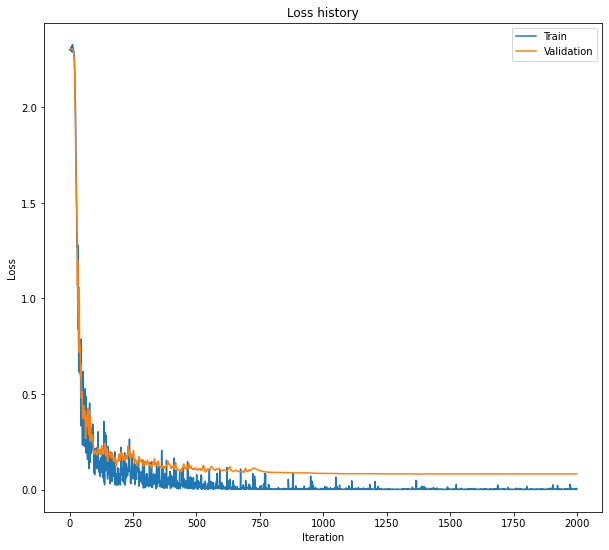

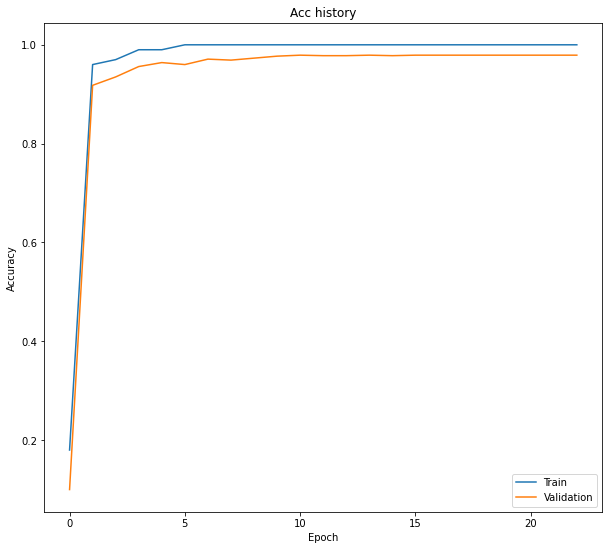

In [8]:
from Network import Network

student_id = 2018010650
np.random.seed(student_id)

# TODO : show your result

idx = np.argmax(grid_search_record['acc'])
acc = grid_search_record['acc'][idx]
learning_rate = grid_search_record['learning_rate'][idx]
wd_decay = grid_search_record['wd_decay'][idx]
hidden_size = grid_search_record['hidden_size'][idx]

print('-----------------')
print('best parameters:')
print('lr: %.1f  L2regfactor: %.2f  hidden_size: %d' %(learning_rate, wd_decay, hidden_size))
print('Final accuracy under these parameters:', acc)
print('-----------------')

net = Network(hidden_size = hidden_size)
stats = net.train(X_train, y_train, X_val, y_val,
        learning_rate=learning_rate, momentum=0.9, wd_decay=wd_decay, 
        num_iters=2000, batch_size=100,
        do_early_stopping=False,
        print_every=50, verbose=True,
        do_lr_decay=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])


### 总结
通过网格搜索法找到了一组比较优的超参数：

lr: 0.3；L2regfactor: 0.00；hidden_size: 512

Final accuracy under these parameters: 0.975

简单对比，从训练过程中可以看出，loss明显比上一个任务中的小，约两个数量级；从acc的曲线也可以看出，没有出现过拟合现象，不需要early stopping；
只有一个隐层的MLP在MNIST数据集（部分）上的分类精度达到了97.5%，可见神经网络的作用，以及超参数选择的重要性。